# Forecasting is one of the best known techniques used by Data Scientists to predict business indicators.

## Create a model that will predict how much senators will spend over the next three months?

## This [dataset](https://encr.pw/cr8d6) contains data from 2018 to 2021 from CEAPS, and in it you will find two columns:

- DS, which represents the refund date;
- Y, which is the sum of senators' repayments for that day.

# Load libraries

In [112]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [4]:
dataset = pd.read_csv('dataset/dataset_ceaps_forecasting.csv', sep=',')
dataset

,ds,y
0,2018-01-01,13062.46
1,2018-01-02,61972.66
2,2018-01-03,54424.44
3,2018-01-04,21775.57
4,2018-01-05,41703.32
...,...,...
1456,2021-12-27,28552.41
1457,2021-12-28,154547.27
1458,2021-12-29,22495.76
1459,2021-12-30,118345.56


# Using [Prophet](https://facebook.github.io/prophet/docs/quick_start.html?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Ci%C3%AAncia+de+Dados+3%2F7%3A+Forecasting&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Java%29+Dia+3%2F7%3A+Modelando+um+dom%C3%ADnio#python-api)

## Fit data

In [12]:
model = Prophet()
model.fit(dataset)
model

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.6735
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98       2760.44   5.15181e-05       71.1376   6.785e-07       0.001      174  LS failed, Hessian reset 
      99       2760.44   4.67601e-05       74.9138           1           1      175   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     186       2760.48   0.000104094       82.8618   1.276e-06       0.001      335  LS failed, Hessian reset 
     199       2760.49   3.83933e-06       71.2909       0.186      0.5507      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       2760.49   8.09145e-08       63.6074      0.4209           1      383   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


## Create the dataset with futures dates

In [13]:
dataset_future = model.make_future_dataframe(periods=365)
dataset_future.tail()

,ds
1821,2022-12-27
1822,2022-12-28
1823,2022-12-29
1824,2022-12-30
1825,2022-12-31


## Make predictions

In [14]:
dataset_forecast = model.predict(dataset_future)
dataset_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1821,2022-12-27,85707.782863,33839.756408,136974.974540
1822,2022-12-28,85833.105788,39784.350717,139639.795340
1823,2022-12-29,71212.730567,19227.226580,128119.919066
1824,2022-12-30,57834.278150,3831.867697,109425.968888
1825,2022-12-31,6689.052374,-44527.751747,62271.243097


## Plot the prevision

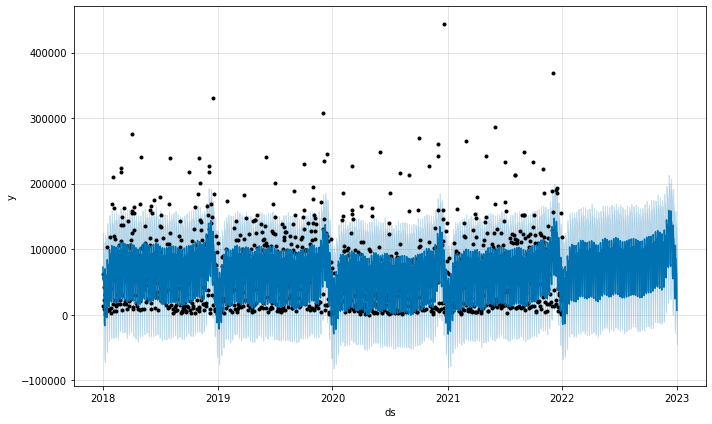

In [15]:
fig1 = model.plot(dataset_forecast)

## Plot the components

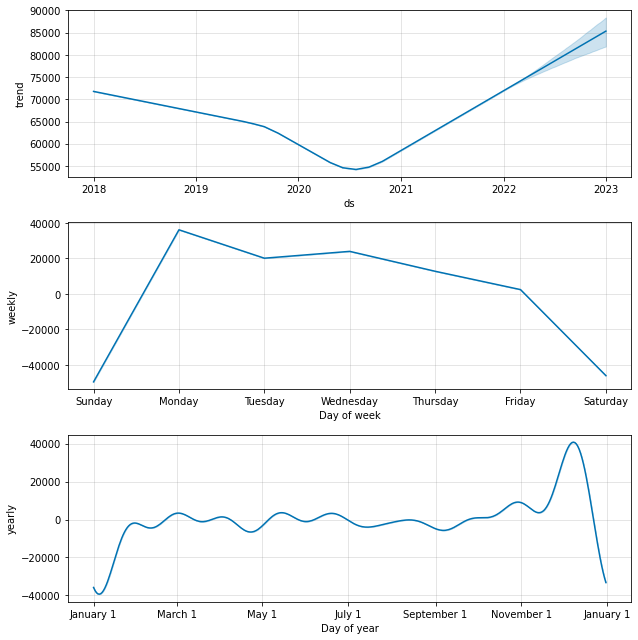

In [16]:
fig2 = model.plot_components(dataset_forecast)

# Using [linear regression](https://stackabuse.com/linear-regression-in-python-with-scikit-learn/)

### This model needs fine tuning, it is not working well for the data used

## Convert date to numerical value

In [56]:
dataset_lr = dataset.copy()
dataset_lr['ds'] = pd.to_datetime(dataset_lr['ds'])
dataset_lr['ds'] = dataset_lr['ds'].map(dt.datetime.toordinal)
dataset_lr

,ds,y
0,736695,13062.46
1,736696,61972.66
2,736697,54424.44
3,736698,21775.57
4,736699,41703.32
...,...,...
1456,738151,28552.41
1457,738152,154547.27
1458,738153,22495.76
1459,738154,118345.56


## Plot the data

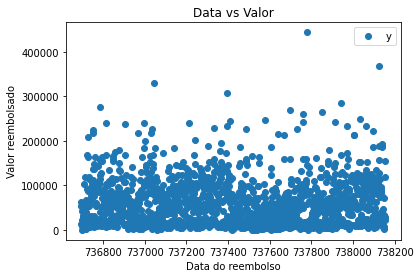

In [91]:
dataset_lr.plot(x='ds', y='y', style='o')
plt.title('Data vs Valor')
plt.xlabel('Data do reembolso')
plt.ylabel('Valor reembolsado')
plt.show()

## Preparing the data

In [99]:
X = dataset_lr.iloc[:, :-1].values
y = dataset_lr.iloc[:, 1].values

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the model

In [102]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [106]:
print ('Intercept: \n', model.intercept_)
print('Coefficient: \n', model.coef_)

Intercept: 
 2204795.1237714277
Coefficient: 
 [-2.90381579]


## Make predictions

In [108]:
y_pred = model.predict(X_test)
y_pred

array([64029.53049588, 63660.74589098, 64235.70141673, 64758.38825832,
       63663.64970677, 62420.81655011, 61491.5954984 , 62670.54470775,
       64171.81746943, 63570.7276016 , 61741.32365604, 63428.44062806,
       61790.68852441, 61828.43812964, 64102.12589055, 64830.98365298,
       61726.80457711, 65310.11325777, 65478.5345734 , 64166.00983785,
       65156.21102108, 62293.0486555 , 65417.55444188, 62830.25457602,
       63927.89694335, 62685.06378669, 61622.26720879, 62429.52799747,
       61784.88089284, 63155.48194412, 63451.67115435, 62435.33562904,
       64523.1791796 , 65556.93759963, 63596.86194368, 63698.49549621,
       65469.82312604, 62589.23786573, 62313.375366  , 61523.53747205,
       65060.38510013, 65411.7468103 , 64404.12273235, 62345.31733966,
       64897.77141608, 64610.2936532 , 61421.90391952, 64891.9637845 ,
       64041.14575903, 62519.54628685, 65101.03852114, 64154.39457471,
       62699.58286562, 64427.35325865, 64331.52733769, 63933.70457492,
      

In [109]:
df = pd.DataFrame({'Atual': y_test, 'Predito': y_pred})
df

,Atual,Predito
0,22254.92,64029.530496
1,7463.24,63660.745891
2,70732.08,64235.701417
3,3195.25,64758.388258
4,12786.78,63663.649707
...,...,...
288,12029.14,64290.873917
289,102918.49,63727.533654
290,76346.52,64134.067864
291,30382.25,65391.420100


## Evaluating the model

In [113]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 39626.87706061144
Mean Squared Error: 2463198648.895215
Root Mean Squared Error: 49630.622088537384
